# Exploratory Data Analysis of Spotify Streaming History

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset 
df=pd.read_csv('/Users/ajaythirumurthi/Downloads/spotify_history.csv')

In [4]:
# Display dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [5]:
# Summary statistics
df.describe(include="all")

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
count,149860,149860,149860,1.498600e+05,149860,149860,149860,149717,149743,149860,149860
unique,16527,140422,6,NaN,13839,4113,7948,13,15,2,2
top,1BLOVHYYlH4JUHQGcpt75R,2018-09-30 21:43:18,android,NaN,Ode To The Mets,The Beatles,The Beatles,trackdone,trackdone,True,False
freq,207,125,139821,NaN,207,13621,2063,76655,77194,111583,141991
mean,NaN,NaN,NaN,1.283166e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.178401e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.795000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.388400e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.185070e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Insights:
##### - The dataset contains 149,860 records with 16,527 unique track URIs, indicating many tracks are played multiple times.
##### - The most frequently played track appears 207 times.
##### - The most common platform used is Android, appearing 139,821 times.
##### - Users predominantly complete tracks, as "trackdone" appears most frequently in both reason_start and reason_end.
##### - The average listening duration is 128,316 milliseconds (approximately 2 minutes 8 seconds).
##### - The minimum play duration is 0 milliseconds, suggesting some tracks were skipped or stopped immediately.
##### - The maximum recorded play duration is 1,561,125 milliseconds (around 26 minutes), possibly indicating long-duration tracks or idle playback.
##### - Shuffle mode is enabled in most sessions, appearing 111,583 times.
##### - Skipping behavior suggests users generally do not skip tracks, as "False" appears more frequently in the skipped column.

In [7]:
# Show the first 10 rows of the dataset
df.head(10)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False
6,1I4EczxGBcPR3J3KeyqFJP,2013-07-08 03:17:56,web player,0,We Own The Sky,M83,Saturdays = Youth,nextbtn,nextbtn,False,False
7,5arVt2Wg0zbiWwAOZef2Nl,2013-07-08 03:17:56,web player,1268,Higher Ground - Remastered 2003,Red Hot Chili Peppers,Mother's Milk,nextbtn,nextbtn,False,False
8,1ixtaZc0Adil3yD1ItPqSl,2013-07-08 03:17:58,web player,0,Happy Up Here,Röyksopp,Happy Up Here,nextbtn,nextbtn,False,False
9,2v5mpowLQNFN7NC46l0bJS,2013-07-08 03:19:11,web player,0,Phantom,Justice,Phantom,nextbtn,clickrow,False,False


In [8]:
# Checking for missing values 
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [9]:
# Checking for duplicates 
df.duplicated().sum()

1185

In [10]:
# Removing missing values
df = df.dropna()

# Removing duplicates
df = df.drop_duplicates()

In [11]:
# Convert timestamp column to datetime format and extract day, month, year, and hour
df['ts'] = pd.to_datetime(df['ts'])
df['day'] = df['ts'].dt.day
df['month'] = df['ts'].dt.month
df['year'] = df['ts'].dt.year
df['hour'] = df['ts'].dt.hour

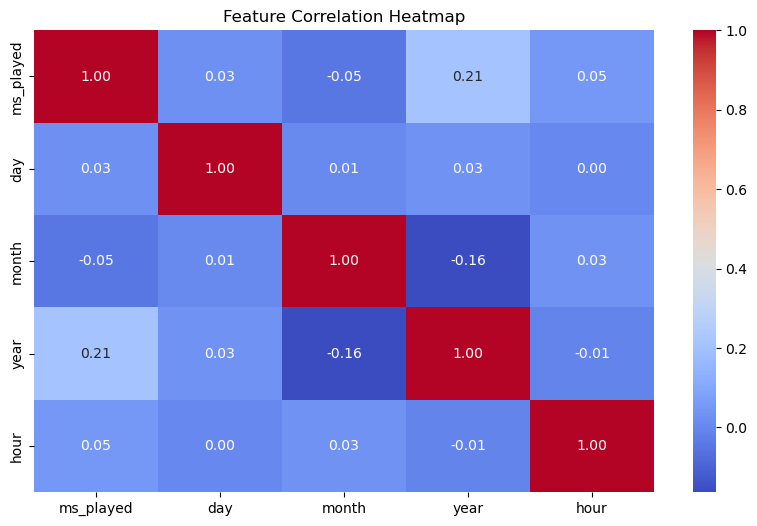

In [12]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Generate a heatmap to visualize the correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

##### Conclusion:
##### - No strong correlations exist in the dataset.
##### - Listening time (ms_played) has a mild positive trend with year.
##### - Other numerical features (day, month, hour) do not strongly influence each other.

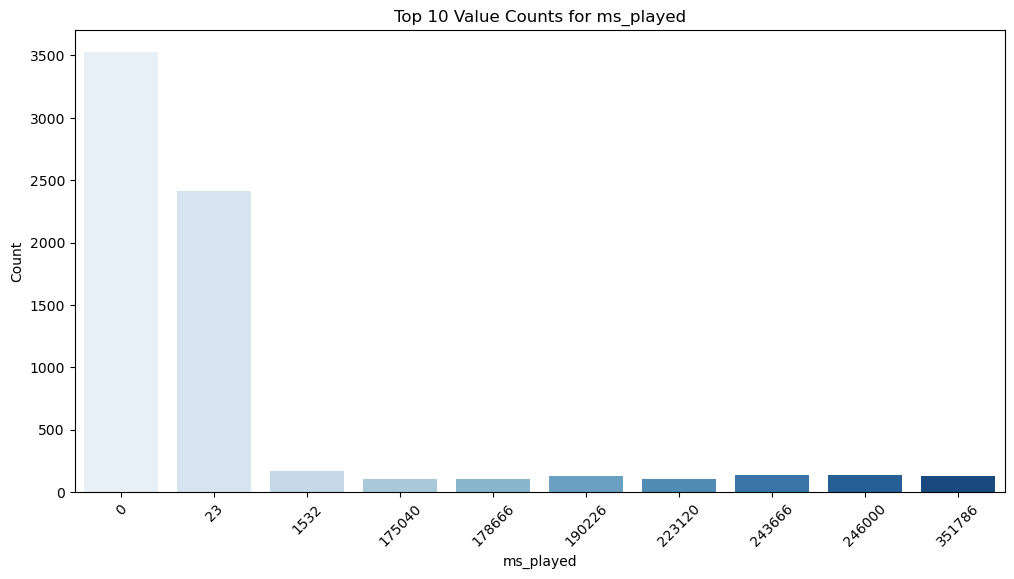

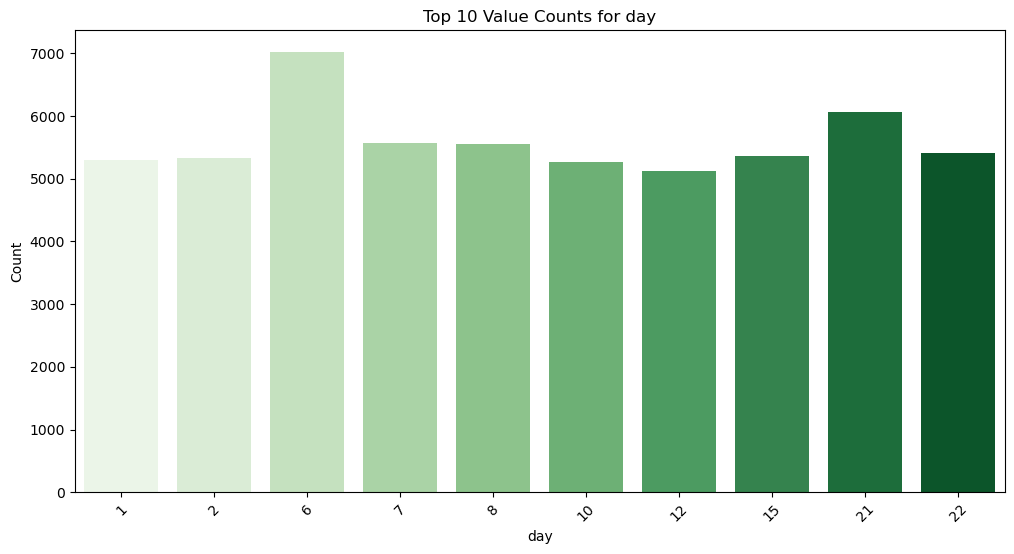

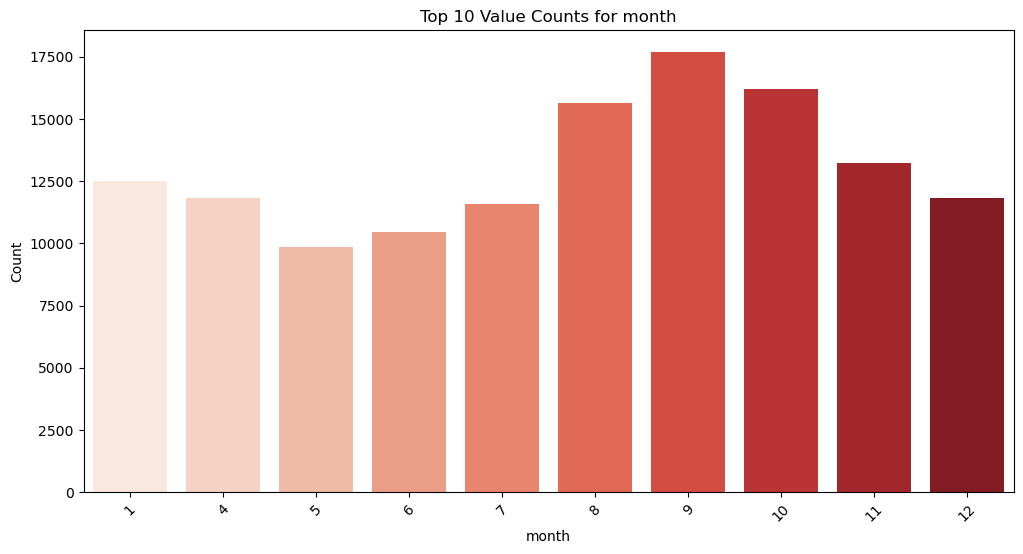

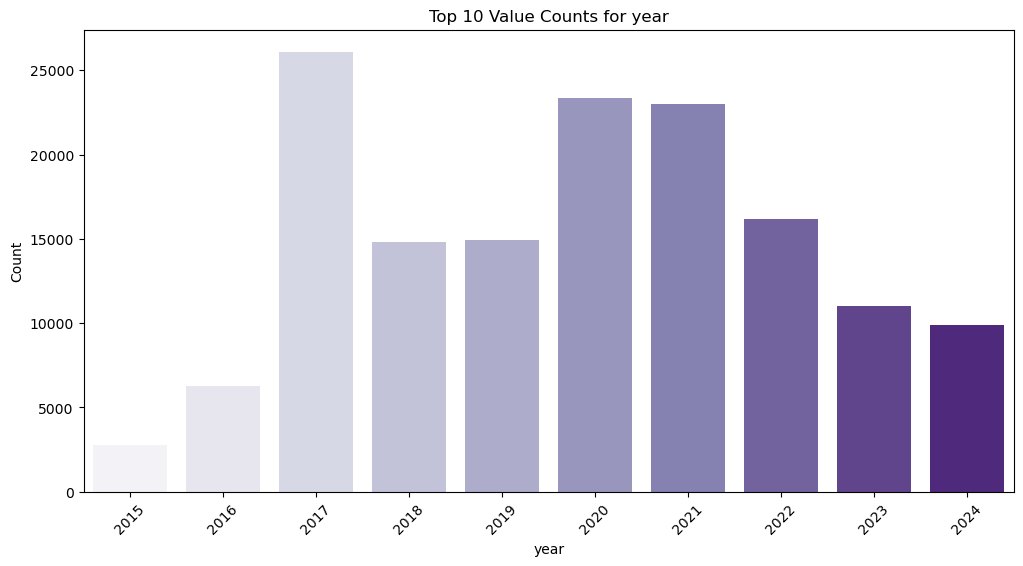

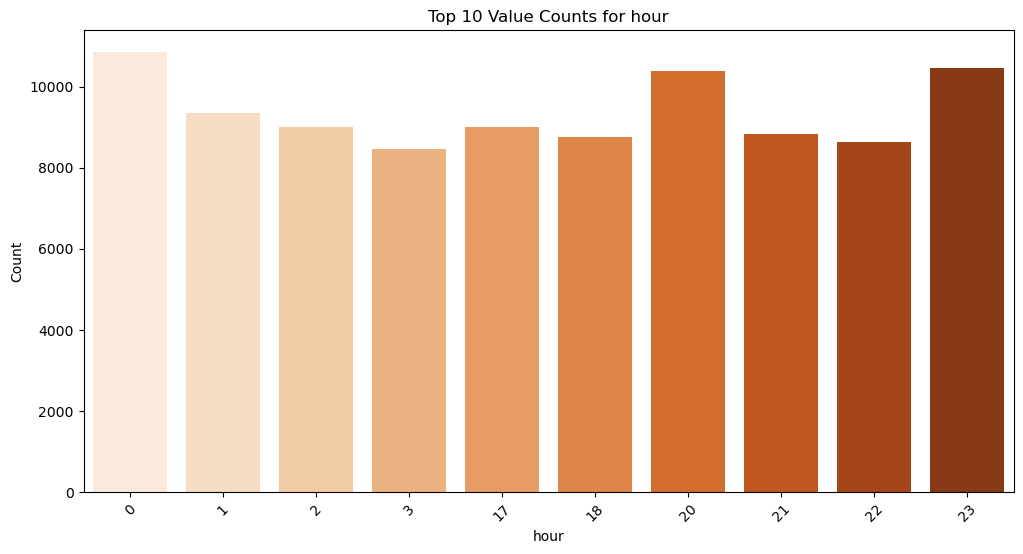

In [14]:
# Selecting numerical columns except 'ts'
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.drop('ts', errors='ignore')

# Define a list of color palettes
color_palettes = ["Blues", "Greens", "Reds", "Purples", "Oranges", "coolwarm", "magma", "viridis"]

# Loop through categorical columns to visualize value counts
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(12, 6))

    # Select a color palette based on the number of unique values
    unique_values = min(len(df[col].value_counts()), 10)  # Ensure correct number of colors
    palette = sns.color_palette(color_palettes[i % len(color_palettes)], n_colors=unique_values)

    # Create the barplot with `hue` and `legend=False` to avoid FutureWarning
    sns.barplot(
        x=df[col].value_counts().head(10).index, 
        y=df[col].value_counts().head(10).values,
        hue=df[col].value_counts().head(10).index,  # Assign hue
        dodge=False,  # Avoid splitting bars
        palette=palette,  
        legend=False  # Disable legend
    )
    
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Top 10 Value Counts for {col}")
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()


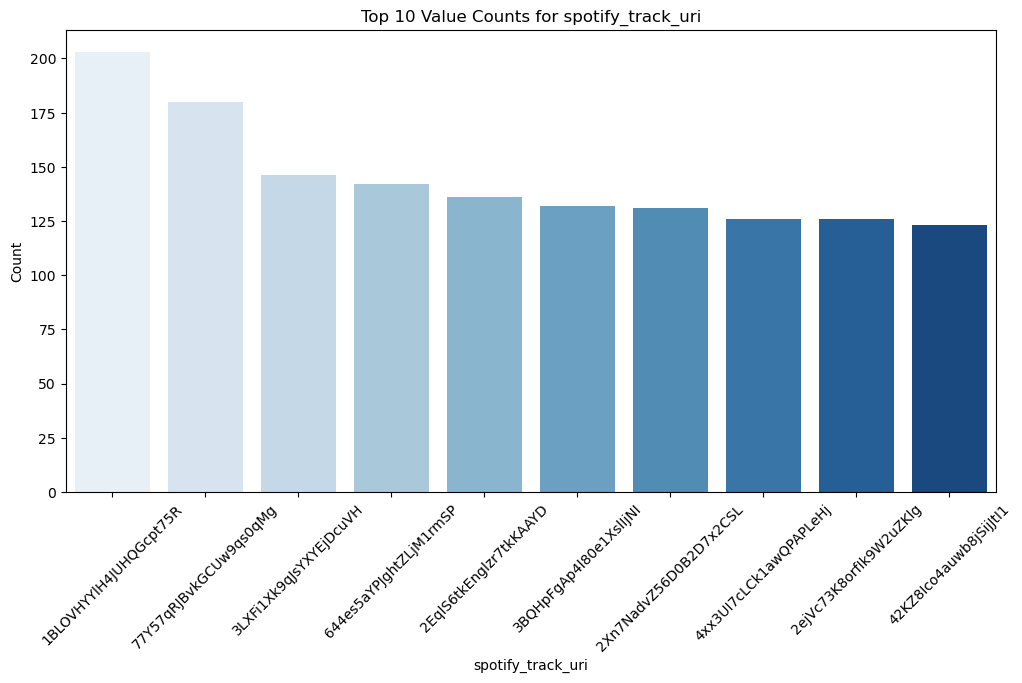

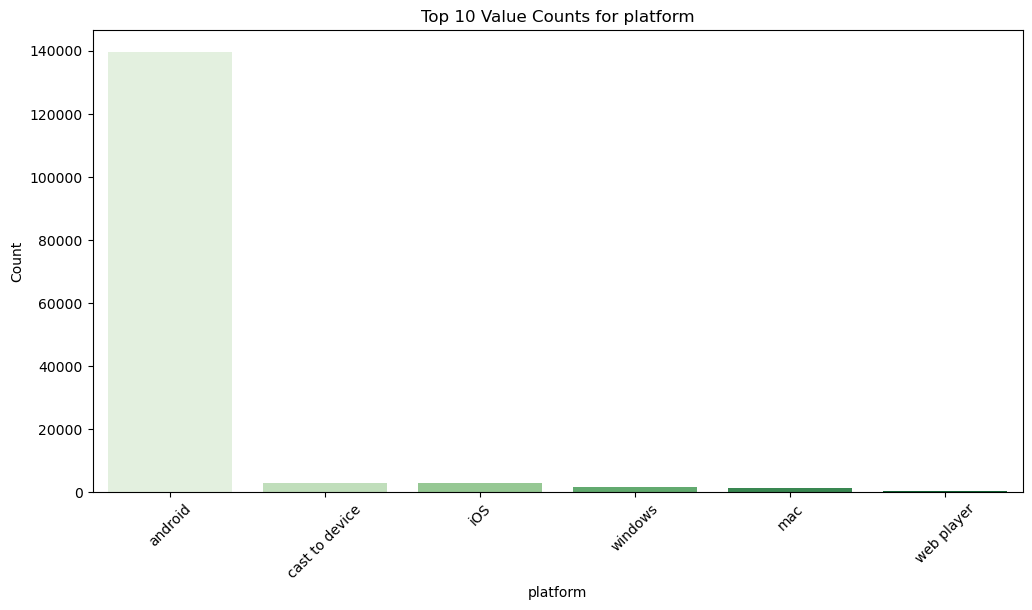

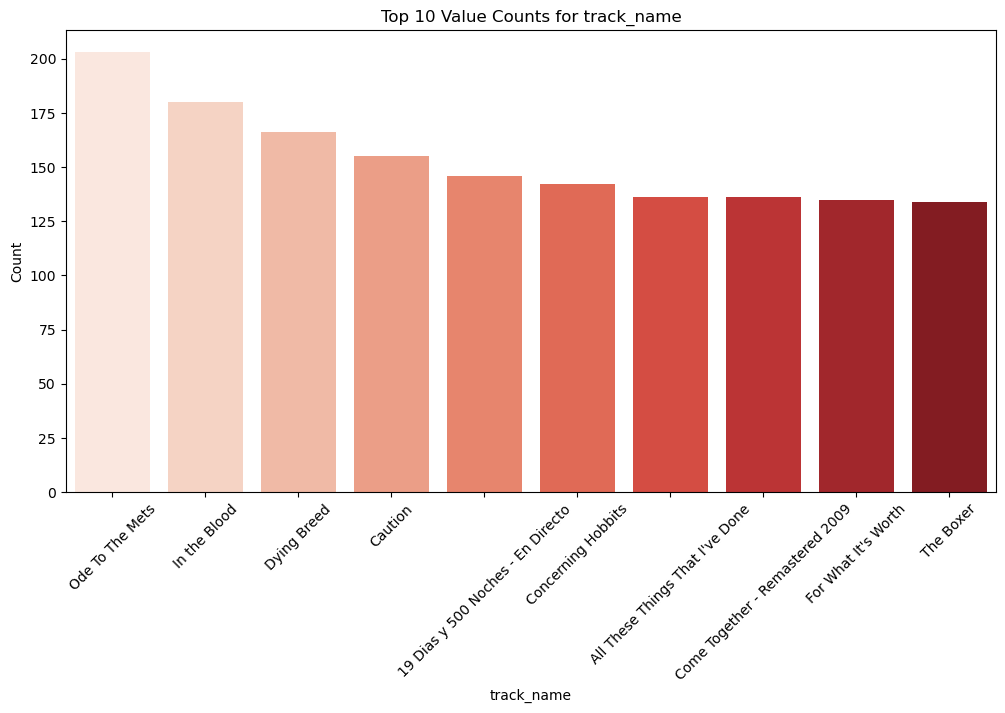

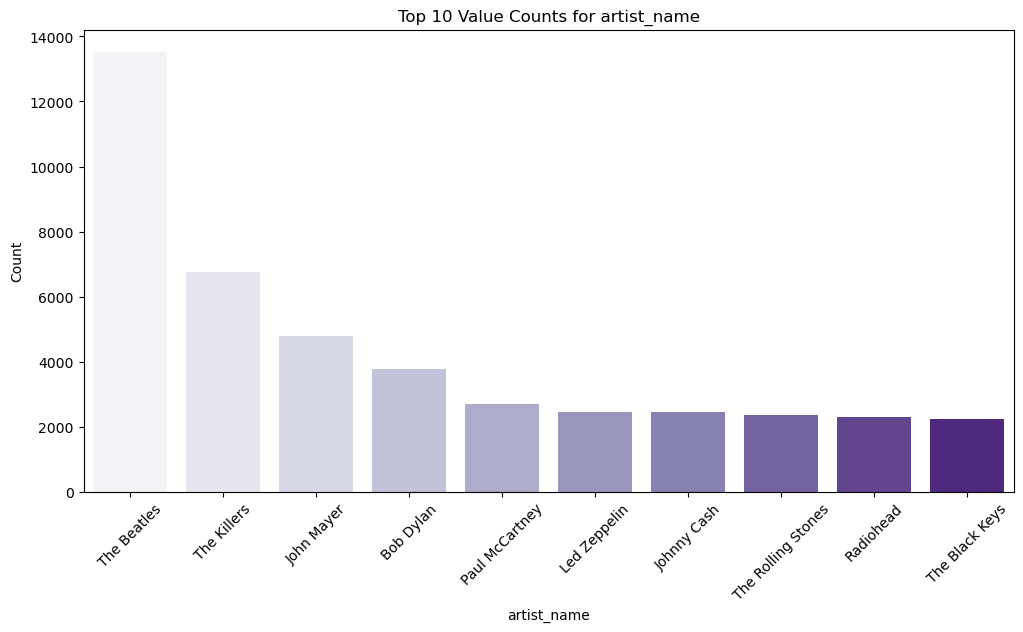

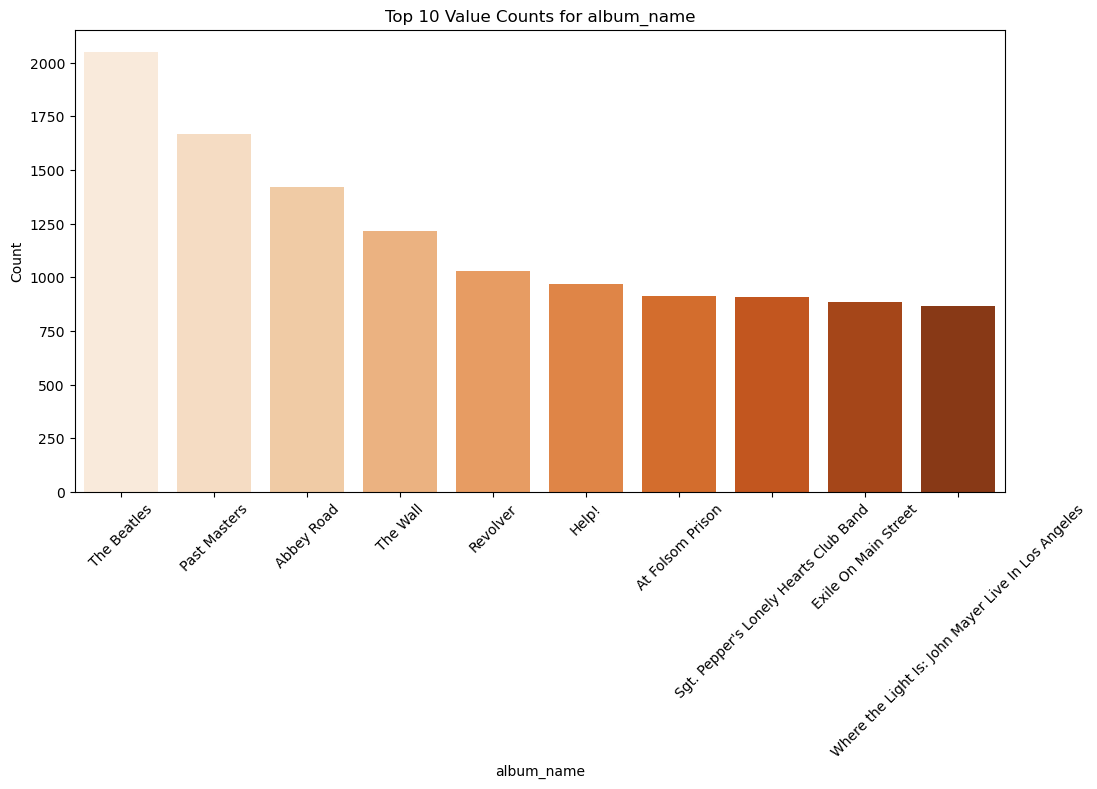

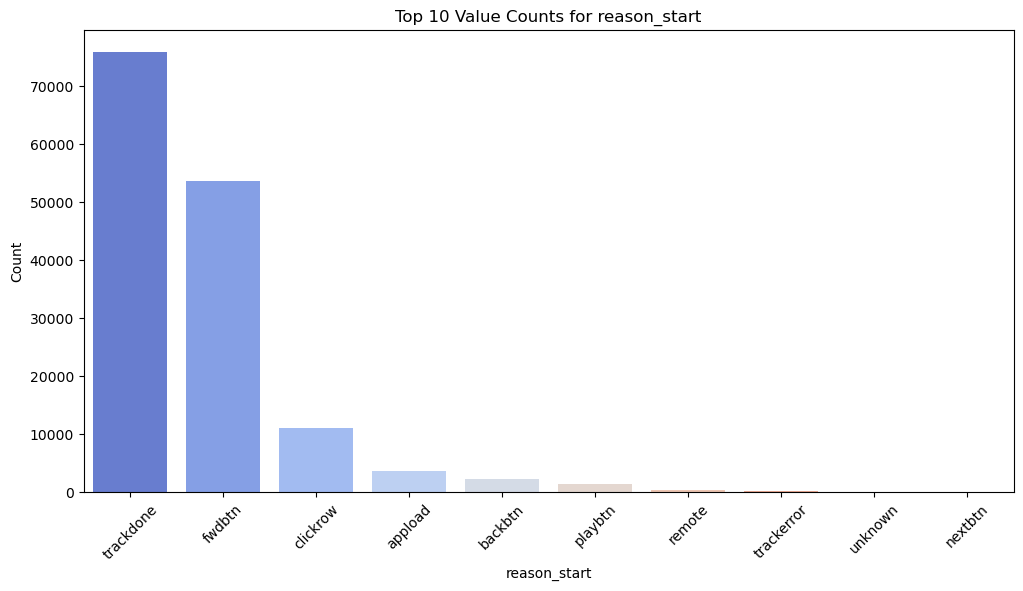

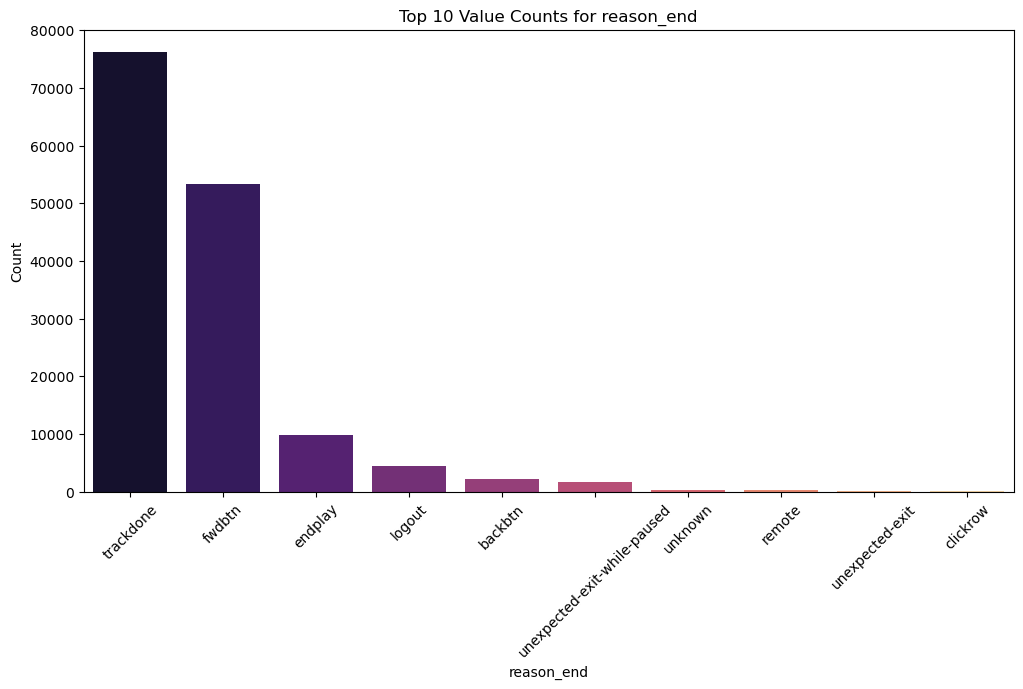

In [15]:
# Get value counts for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns

# Define a list of color palettes
color_palettes = ["Blues", "Greens", "Reds", "Purples", "Oranges", "coolwarm", "magma", "viridis"]

# Loop through categorical columns to visualize value counts
for i, col in enumerate(categorical_columns):
    plt.figure(figsize=(12, 6))

    # Select a color palette based on the number of unique values
    unique_values = min(len(df[col].value_counts()), 10)  # Ensure correct number of colors
    palette = sns.color_palette(color_palettes[i % len(color_palettes)], n_colors=unique_values)

    # Create the barplot with `hue` and `legend=False` to avoid FutureWarning
    sns.barplot(
        x=df[col].value_counts().head(10).index, 
        y=df[col].value_counts().head(10).values,
        hue=df[col].value_counts().head(10).index,  # Assign hue
        dodge=False,  # Avoid splitting bars
        palette=palette,  
        legend=False  # Disable legend
    )
    
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Top 10 Value Counts for {col}")
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()


In [16]:
# Save the updated DataFrame to a CSV file
df.to_csv("updated_spotify_data.csv", index=False)

# 1. Classifying Song-Skipping Behaviour

## Logistic Regression
##### Using Logistic Regression because it is a simple and effective classification algorithm that provides probabilistic outputs, making it useful for binary classification problems like predicting whether a user will skip a song or not.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Selecting features and target variable
features = ["platform", "ms_played", "reason_start", "reason_end", "shuffle", "day", "month", "year", "hour"]
target = "skipped"

# Splitting dataset into train and test sets
X = df[features]
y = df[target].astype(int)  # Convert boolean to integer

# Identify categorical and numerical columns
categorical_cols = ["platform", "reason_start", "reason_end"]
numerical_cols = ["ms_played", "shuffle", "day", "month", "year", "hour"]

# Preprocessing: OneHotEncoding categorical variables, scaling numerical variables
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Define logistic regression model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the logistic regression model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.9524
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     28144
           1       0.69      0.16      0.26      1549

    accuracy                           0.95     29693
   macro avg       0.82      0.58      0.62     29693
weighted avg       0.94      0.95      0.94     29693



#### Insights:
##### - The model has 95.24% accuracy, but class imbalance affects performance.
##### - Class 0 performs well with high precision (0.96), recall (1.00), and F1-score (0.98).
##### - Class 1 is poorly predicted, with low precision (0.69), recall (0.16), and F1-score (0.26).
##### - The dataset is highly imbalanced (28,144 class 0 vs. 1,549 class 1).
##### - The macro F1-score (0.62) shows imbalance, while the weighted F1-score (0.94) is inflated by class 0.

## SVM (Support Vector Classifier)
##### Using SVM (Support Vector Classifier) because it is effective for high-dimensional data and can handle non-linearly separable cases using kernel tricks, making it a robust choice for predicting song-skipping behavior.

In [22]:
from sklearn.svm import SVC

# Define SVM model pipeline with RBF kernel (faster for large data)
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True))  # RBF is faster & effective
])

# Train SVM model
svm_pipeline.fit(X_train, y_train)

# Predict using SVM
y_pred_svm = svm_pipeline.predict(X_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Print results
print("Optimized SVM Model Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

Optimized SVM Model Accuracy: 0.9990233388340687
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28144
           1       1.00      0.98      0.99      1549

    accuracy                           1.00     29693
   macro avg       1.00      0.99      1.00     29693
weighted avg       1.00      1.00      1.00     29693



#### Insights: 
##### - Logistic Regression performed well for non-skipped songs but had low recall (0.16) for skipped songs, leading to misclassification.
##### - SVM achieved near-perfect accuracy (99.90%), effectively capturing complex patterns.
##### - The high SVM performance suggests possible overfitting, requiring further validation on unseen data.

# 2.  Segmenting Users Based on Listening Habits

## K-Means
##### Using K-Means because it is an efficient and scalable clustering algorithm that works well for large datasets, making it suitable for segmenting users based on listening patterns. It partitions data into distinct clusters by minimizing intra-cluster variance.


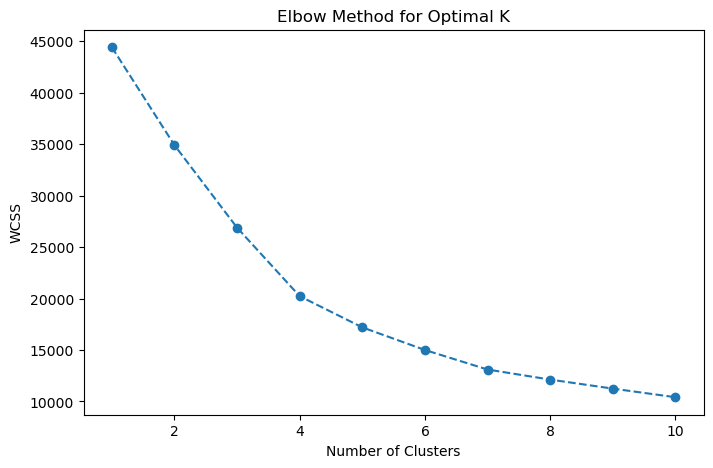

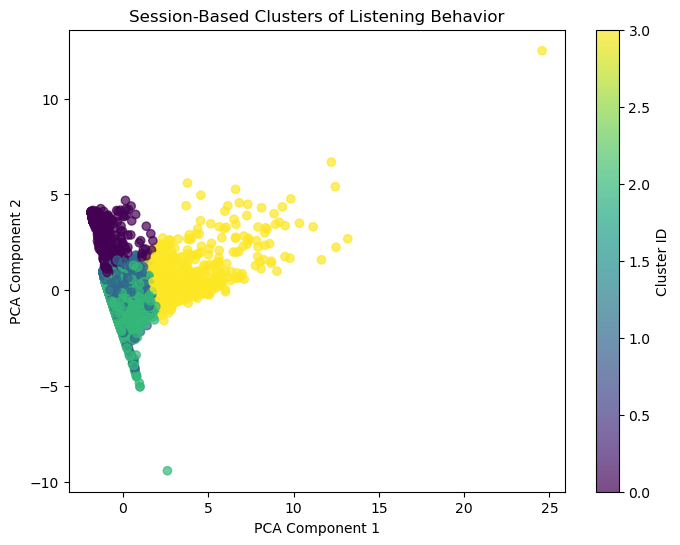

   session_id  total_playtime   avg_playtime  skip_rate  total_songs  \
0           0         6611670  101718.000000       0.00           65   
1           1         3127780  107854.482759       0.00           29   
2           2            1826    1826.000000       0.00            1   
3           3          345626  345626.000000       0.00            1   
4           4          448477  112119.250000       0.75            4   

   median_hour  cluster  
0          4.0        3  
1          1.0        1  
2          5.0        1  
3          7.0        1  
4          8.0        0  


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Convert timestamp to datetime format
df['ts'] = pd.to_datetime(df['ts'])

# Define "session" based on timestamp gaps (assuming a 30-minute session reset)
df = df.sort_values(by='ts')  # Ensure chronological order
df['session_id'] = (df['ts'].diff() > pd.Timedelta(minutes=30)).cumsum()

# Aggregate data at session level
session_data = df.groupby('session_id').agg({
    'ms_played': ['sum', 'mean'],  # Total and avg playtime in a session
    'skipped': ['mean'],  # Skip rate per session
    'track_name': 'count',  # Total songs played in session
    'hour': 'median'  # Median hour of the session (for time-based trends)
}).reset_index()

# Rename columns
session_data.columns = ['session_id', 'total_playtime', 'avg_playtime', 'skip_rate', 'total_songs', 'median_hour']

# Drop session_id for clustering
X = session_data.drop(columns=['session_id'])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose best K (from Elbow Method)
optimal_k = 4  # Adjust based on elbow point

# Fit K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
session_data['cluster'] = kmeans.fit_predict(X_scaled)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=session_data['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Session-Based Clusters of Listening Behavior")
plt.colorbar(label="Cluster ID")
plt.show()

# Display clustered session data
print(session_data.head())  # Display first few rows



### 1. User Behavior Clusters Exist
##### The clustering algorithm has segmented users into four distinct groups based on their listening patterns.
##### The clusters (0, 1, 2, and 3) suggest different types of listeners, which can help in personalization.
### 2. Distinct Listening Patterns
#### *Cluster 0 (Dark Purple, Densely Packed Near Origin)
##### Users in this cluster likely have low total playtime and shorter sessions.
##### They might be casual listeners, sampling a few songs before leaving.
#### *Cluster 1 (Blue-Green, Spreads Slightly Outward)
##### Likely represents moderate listeners who engage more but still have structured, shorter sessions.
#### *Cluster 2 (Green, Expands Further)
##### Users here have higher engagement but still differ from extreme listeners.
##### They might have longer sessions, skipping less.
#### *Cluster 3 (Yellow, Spread Out the Most)
##### Represents highly engaged users with long listening sessions.
##### These users likely spend the most time streaming and could be targeted for premium features.
### 3. Skipping Behavior & Playtime Trends
##### The dataset snippet shows skip_rate values, which could correlate with clusters.
##### Cluster 3 users (high playtime) likely skip less, while Cluster 0 users may skip more (shorter sessions).
##### Example: One session has skip_rate = 0.75, suggesting a user who skips frequently, potentially indicating dissatisfaction.
### 4. Peak Listening Hours Impact Clustering
##### The median_hour data suggests that listening behavior varies based on the time of day.
##### Clusters might be time-dependent (e.g., casual listeners tuning in during commutes vs. binge listeners at night).
##### Cluster 1 (which includes median hours 1 AM, 5 AM, 7 AM, 8 AM) suggests early-hour listening behavior.
### 5. Business Implications
##### Personalized Recommendations: Cluster 3 users (yellow) might prefer longer playlists, while Cluster 0 users (purple) might need shorter, curated playlists.
##### Subscription Strategy: High engagement users (Cluster 3) can be encouraged to upgrade to premium plans.
##### User Retention: If Cluster 0 users churn quickly, offering tailored suggestions or free trials could help retain them.
##### Ad Targeting: Clusters could be used to optimize ad placements, with casual users seeing more ads and premium users getting ad-free experiences. 


# 3.	Predicting Peak Listening Times
## Time Series Forecasting

## ARIMA 
#### Running ARIMA for daily, weekly, and monthly streaming trends to capture long-term patterns in the data. Since the dataset is aggregated at different time intervals, ARIMA helps model overall growth or decline over time.

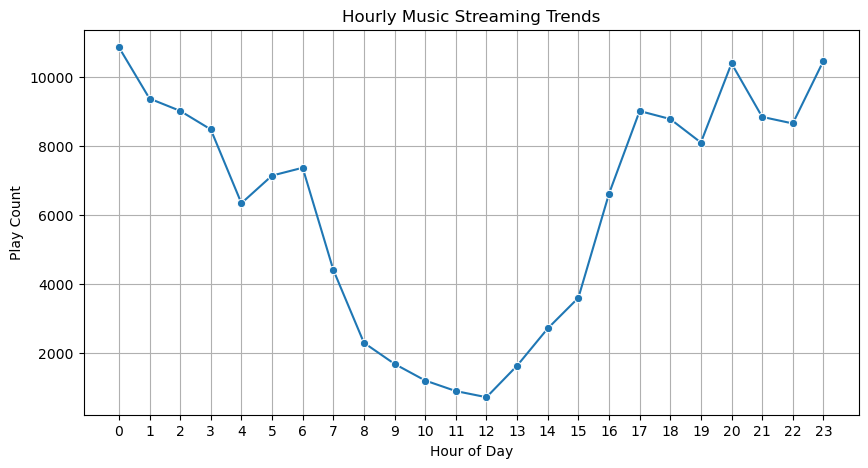

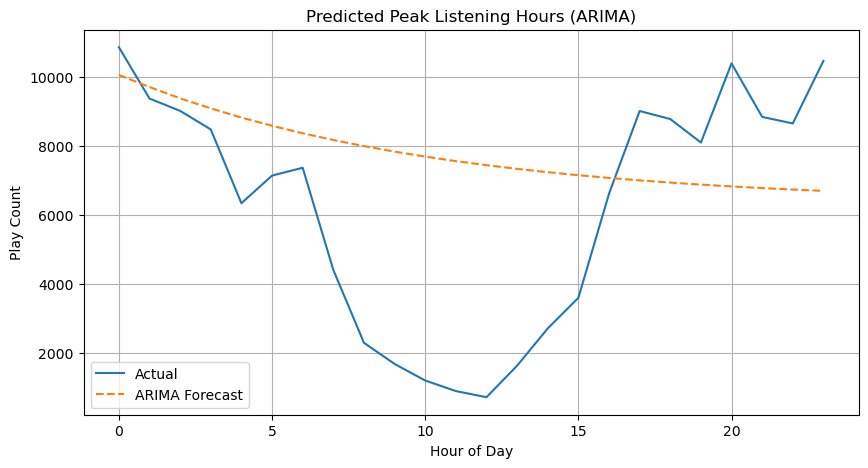

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# Aggregate data by hour
hourly_listens = df.groupby(df['ts'].dt.hour)['ms_played'].count().reset_index()
hourly_listens.columns = ['hour', 'play_count']

# Plot historical listening trends
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_listens['hour'], y=hourly_listens['play_count'], marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Play Count')
plt.title('Hourly Music Streaming Trends')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Prepare data for ARIMA
hourly_listens.set_index('hour', inplace=True)
model_arima = ARIMA(hourly_listens['play_count'], order=(2,1,2))  # ARIMA(p,d,q)
model_fit_arima = model_arima.fit()

# Forecast next 24 hours
forecast_arima = model_fit_arima.forecast(steps=24)

# Plot ARIMA forecast
plt.figure(figsize=(10,5))
plt.plot(hourly_listens.index, hourly_listens['play_count'], label="Actual")
plt.plot(range(24), forecast_arima, label="ARIMA Forecast", linestyle="dashed")
plt.xlabel('Hour of Day')
plt.ylabel('Play Count')
plt.title('Predicted Peak Listening Hours (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()


### Insights:
##### * Music streaming activity is highest during late evening hours and lowest in the late morning.
##### * Streaming declines from midnight to around 11 AM, reaching its lowest point between 10 AM and 12 PM.
##### * Play counts rise sharply after noon, peaking between 5 PM and 11 PM.
##### * The ARIMA model predicts a smoother declining trend, missing the sharp increase in streaming during peak hours.
##### * The model may need tuning or an alternative approach to better capture non-linear trends.

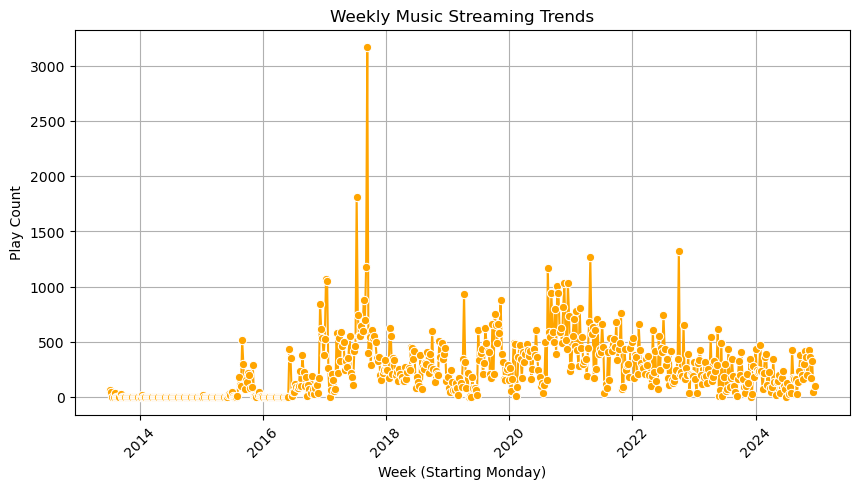

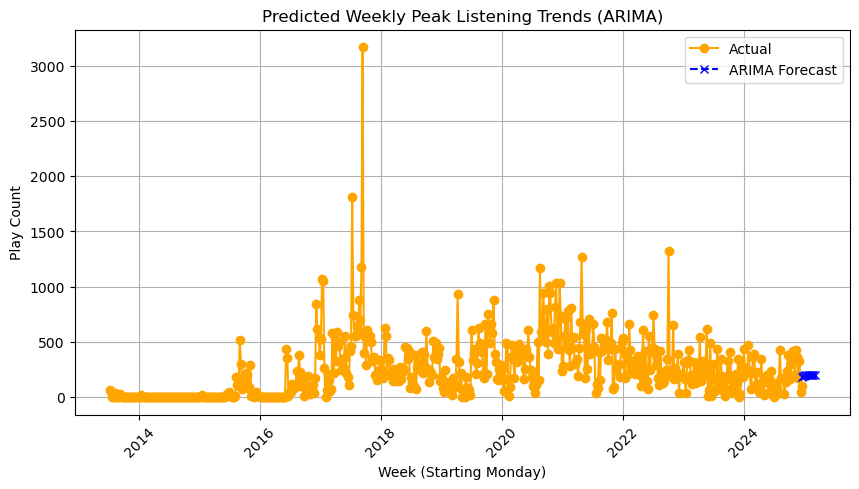

In [32]:
# Aggregate data by week (Monday to Sunday)
weekly_listens = df.resample('W-MON', on='ts').count()['ms_played'].reset_index()
weekly_listens.columns = ['week', 'play_count']

# Plot historical weekly listening trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=weekly_listens['week'], y=weekly_listens['play_count'], marker='o', color='orange')
plt.xlabel('Week (Starting Monday)')
plt.ylabel('Play Count')
plt.title('Weekly Music Streaming Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Prepare data for ARIMA
weekly_listens.set_index('week', inplace=True)
weekly_listens = weekly_listens.asfreq('W-MON')

# Define and fit ARIMA model (tune p, d, q for better results)
model_arima_weekly = ARIMA(weekly_listens['play_count'], order=(2,1,2))  # ARIMA(p,d,q)
model_fit_arima_weekly = model_arima_weekly.fit()

# Forecast next 12 weeks
forecast_arima_weekly = model_fit_arima_weekly.forecast(steps=12)

# Generate future weekly timestamps
future_weeks = pd.date_range(start=weekly_listens.index[-1], periods=12, freq='W-MON')

# Plot ARIMA weekly forecast
plt.figure(figsize=(10, 5))
plt.plot(weekly_listens.index, weekly_listens['play_count'], label="Actual", marker='o', color='orange')
plt.plot(future_weeks, forecast_arima_weekly, label="ARIMA Forecast", linestyle="dashed", marker='x', color='blue')
plt.xlabel('Week (Starting Monday)')
plt.ylabel('Play Count')
plt.title('Predicted Weekly Peak Listening Trends (ARIMA)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Top 5 Predicted Months with Highest Streaming (ARIMA):
   year month_name          yhat
1  2025        Jan  1.239846e+08
2  2025        Feb  1.212841e+08
3  2025        Mar  1.163378e+08
7  2025        Jul  1.160528e+08
6  2025        Jun  1.160454e+08


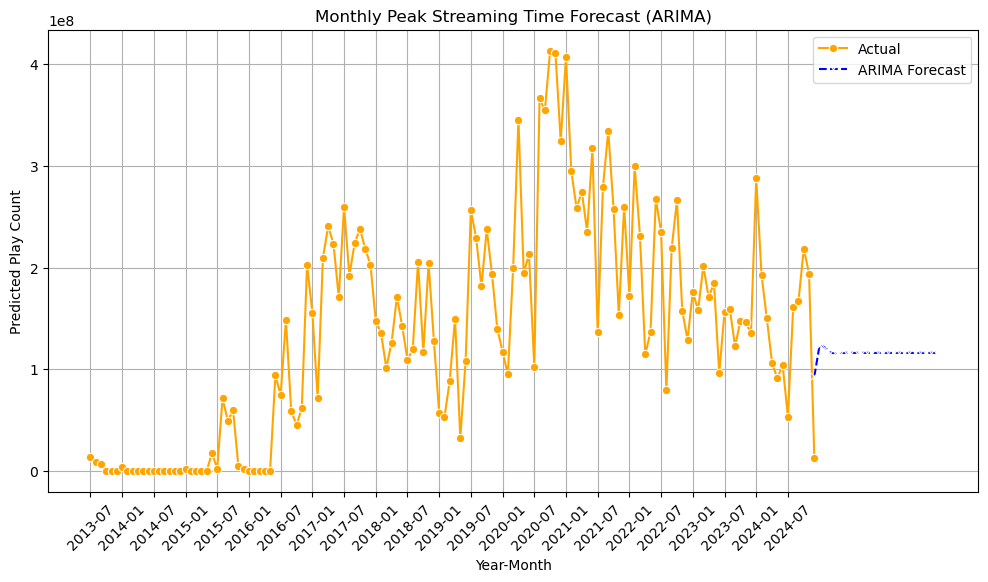

In [33]:

# Aggregate data by month (use 'ME' for month-end)
df_monthly = df.resample('ME', on='ts').sum(numeric_only=True)['ms_played'].reset_index()
df_monthly.columns = ['ds', 'y']  # ARIMA needs time series format with index

# Extract year and month names for better readability
df_monthly['year'] = df_monthly['ds'].dt.year
df_monthly['month_name'] = df_monthly['ds'].dt.strftime('%b')  # Converts to Jan, Feb, etc.

# Set index for ARIMA and explicitly set frequency
df_monthly.set_index('ds', inplace=True)
df_monthly = df_monthly.resample('ME').asfreq()

# Train ARIMA model
model_arima = ARIMA(df_monthly['y'], order=(2,1,2))  # Adjust p,d,q for better results
model_fit_arima = model_arima.fit()

# Forecast the next 24 months (fixes short prediction issue)
forecast_arima = model_fit_arima.forecast(steps=24)

# Generate future monthly timestamps
future_dates = pd.date_range(start=df_monthly.index[-1], periods=24, freq='ME')

# Convert forecast results to DataFrame
forecast_df = pd.DataFrame({'ds': future_dates, 'yhat': forecast_arima.values})
forecast_df['year'] = forecast_df['ds'].dt.year
forecast_df['month_name'] = forecast_df['ds'].dt.strftime('%b')  # Convert to Jan, Feb

# Select top 5 predicted highest streaming months
peak_months_arima = forecast_df[['year', 'month_name', 'yhat']].sort_values(by='yhat', ascending=False).head(5)

print("Top 5 Predicted Months with Highest Streaming (ARIMA):")
print(peak_months_arima)

# Plot Monthly Forecast with Fixed X-Axis Labels
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_monthly.index.strftime('%Y-%m'), y=df_monthly['y'], marker='o', color='orange', label="Actual")
sns.lineplot(x=forecast_df['ds'].dt.strftime('%Y-%m'), y=forecast_df['yhat'], marker='x', linestyle='dashed', color='blue', label="ARIMA Forecast")

plt.xlabel("Year-Month")
plt.ylabel("Predicted Play Count")
plt.title("Monthly Peak Streaming Time Forecast (ARIMA)")

# Fix X-axis labels: Show every 6 months
plt.xticks(rotation=45, ticks=range(0, len(df_monthly), 6))

plt.legend()
plt.grid(True)
plt.show()


## Prophet

18:02:12 - cmdstanpy - INFO - Chain [1] start processing
18:02:40 - cmdstanpy - INFO - Chain [1] done processing


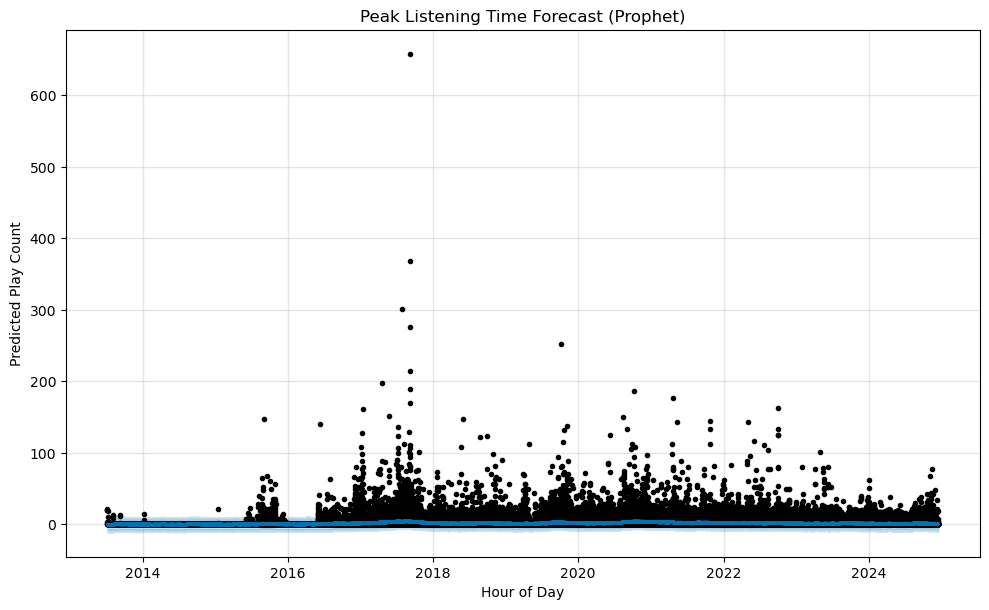

Top 5 Predicted Peak Listening Hours:
                        ds      yhat
100317 2024-12-16 23:00:00  1.914785
100294 2024-12-16 00:00:00  1.782601
100316 2024-12-16 22:00:00  1.728363
100312 2024-12-16 18:00:00  1.669963
100313 2024-12-16 19:00:00  1.664667


In [35]:
# Prepare data for Prophet
df_prophet = df.resample('h', on='ts').count()['ms_played'].reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet requires columns: 'ds' (datetime) and 'y' (value)

# Train Prophet model
prophet = Prophet()
prophet.fit(df_prophet)

# Create future time frame (next 24 hours)
future = prophet.make_future_dataframe(periods=24, freq='h')
forecast_prophet = prophet.predict(future)

# Plot Prophet forecast
prophet.plot(forecast_prophet)
plt.xlabel("Hour of Day")  # X-axis label
plt.ylabel("Predicted Play Count")  # Y-axis label
plt.title("Peak Listening Time Forecast (Prophet)")
plt.show()

# Display peak predicted hours
peak_hours = forecast_prophet[['ds', 'yhat']].tail(24).sort_values(by='yhat', ascending=False).head(5)
print("Top 5 Predicted Peak Listening Hours:")
print(peak_hours)

## Insights

##### 1. Peak listening hours are predicted to be between 18:00 and 23:00 on December 16, 2024.  
##### 2. Listening behavior shows significant fluctuations with occasional extreme spikes.  
##### 3. There is a gradual increase in overall listening trends over time.  
##### 4. Some periods have unusually high play counts, likely due to special events or releases.  
##### 5. Streaming services can optimize recommendations and advertisements around high engagement times.    

18:26:24 - cmdstanpy - INFO - Chain [1] start processing
18:26:24 - cmdstanpy - INFO - Chain [1] done processing


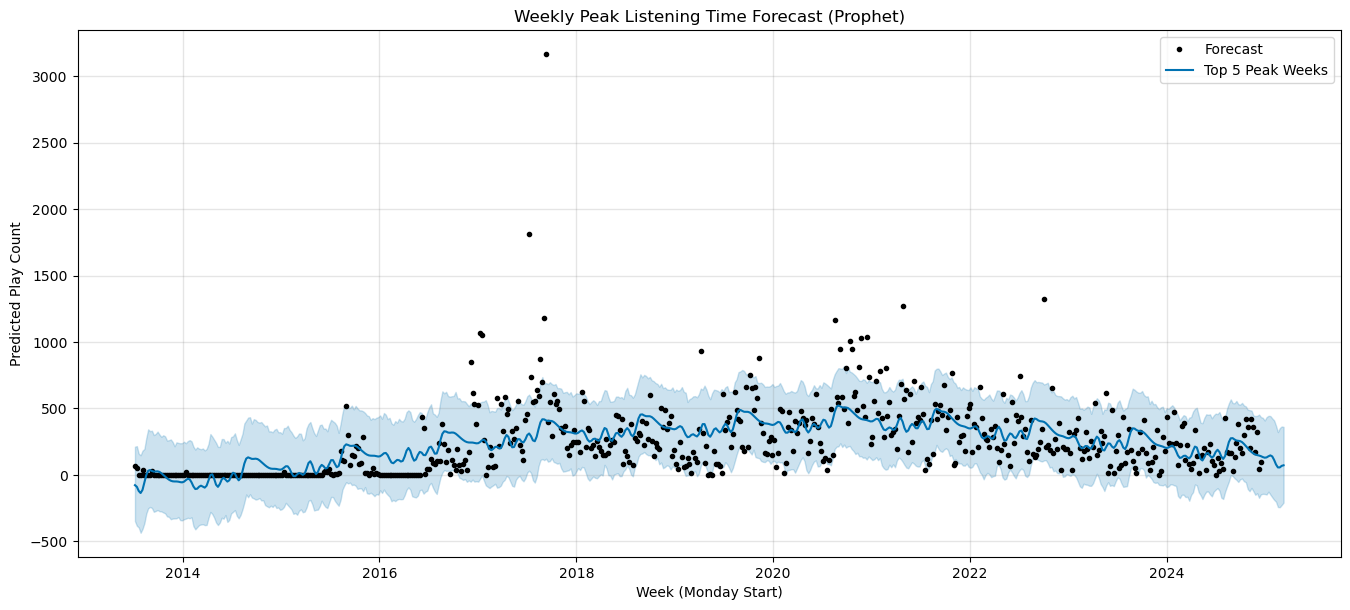

Top 5 Predicted Peak Listening Weeks (Monday-Sunday):
                   week_range        yhat
598  2024-12-23 to 2024-12-29  134.801560
600  2025-01-06 to 2025-01-12  132.058518
601  2025-01-13 to 2025-01-19  140.781330
602  2025-01-20 to 2025-01-26  147.444842
603  2025-01-27 to 2025-02-02  139.629257


In [65]:
# Aggregate data by full weeks (Monday to Sunday)
df_weekly = df.resample('W-MON', on='ts').count()['ms_played'].reset_index()
df_weekly.columns = ['ds', 'y']  # Prophet requires columns: 'ds' and 'y'

# Train Prophet model
prophet_weekly = Prophet()
prophet_weekly.fit(df_weekly)

# Create future time frame (next 12 weeks)
future_weekly = prophet_weekly.make_future_dataframe(periods=12, freq='W-MON')
forecast_weekly = prophet_weekly.predict(future_weekly)

# Add week range for optional display
forecast_weekly['week_range'] = forecast_weekly['ds'].dt.strftime('%Y-%m-%d') + " to " + \
                                (forecast_weekly['ds'] + pd.DateOffset(days=6)).dt.strftime('%Y-%m-%d')

# ✅ Filter only future weeks to find peak ones
future_forecast = forecast_weekly[forecast_weekly['ds'] > df_weekly['ds'].max()]
peak_weeks = future_forecast[['ds', 'yhat']].sort_values(by='yhat', ascending=False).head(5)

# ✅ Plot full forecast
fig = prophet_weekly.plot(forecast_weekly)
fig.set_size_inches(14, 6)
plt.xlabel("Week (Monday Start)")
plt.ylabel("Predicted Play Count")
plt.title("Weekly Peak Listening Time Forecast (Prophet)")

plt.legend(["Forecast", "Top 5 Peak Weeks"])
plt.show()

# 📋 Optional: Print week ranges
forecast_weekly['ds'] = pd.to_datetime(forecast_weekly['ds'])
top_week_ranges = forecast_weekly[forecast_weekly['ds'].isin(peak_weeks['ds'])][['week_range', 'yhat']]
print("Top 5 Predicted Peak Listening Weeks (Monday-Sunday):")
print(top_week_ranges)

# 4.Identifying Patterns in Song Preferences

In [41]:
from itertools import combinations
from collections import Counter


# Ensure timestamp column is properly converted to datetime
df["ts"] = pd.to_datetime(df["ts"], errors="coerce")

# Drop any rows where timestamp conversion failed
df = df.dropna(subset=["ts"])

# Sort by timestamp
df = df.sort_values("ts")

# Define session segmentation: If a song is played after 30 minutes from the last one, start a new session
df["session_id"] = (df["ts"].diff().dt.total_seconds() > 1800).cumsum()

# Group by session and create song baskets (list of songs played in each session)
song_baskets = df.groupby("session_id")["track_name"].apply(list)

# Count song pair occurrences
pair_counts = Counter()

for basket in song_baskets:
    for pair in combinations(set(basket), 2):  # Avoid duplicate pairs in the same session
        pair_counts[pair] += 1

# Convert pair counts into a DataFrame
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=["Song Pair", "Count"])
pair_counts_df = pair_counts_df.sort_values(by="Count", ascending=False)

# Display top frequently played song pairs
print(pair_counts_df.head(20))


                                                 Song Pair  Count
1944666  (Nuovo Cinema Paradiso, Claudia's Theme - Vers...     70
1569581        (Mia & Sebastian’s Theme, Engagement Party)     68
1980402  (The Road Goes Ever On..., Pt. 1, The Return o...     63
1989265  (The Breaking of the Fellowship (feat. "In Dre...     61
1740131  (Totò e Alfredo - Version 2, Tema D'Amore Per ...     59
1740125          (Totò e Alfredo - Version 2, First Youth)     59
1742162               (Nuovo Cinema Paradiso, First Youth)     59
1740138            (Totò e Alfredo - Version 2, Per Elena)     58
1569576                (Mia & Sebastian’s Theme, Epilogue)     57
1742192                 (Nuovo Cinema Paradiso, Per Elena)     57
1740154                           (First Youth, Per Elena)     57
1569863                       (Epilogue, Engagement Party)     57
1989293                   (The Ring Goes South, The Shire)     57
1947321                         (The Great Eye, The Shire)     56
1908767  (

In [43]:
import random

def generate_fast_playlist(pair_counts_df, df, playlist_length=20, max_songs_per_artist=3):
    """
    Generates a fast and diverse playlist using association rule output.

    Parameters:
    - pair_counts_df: DataFrame with "Song Pair" and "Count" columns.
    - df: Original dataset with track_name and artist_name.
    - playlist_length: Number of songs in the playlist.
    - max_songs_per_artist: Maximum allowed songs per artist.

    Returns:
    - A playlist list.
    """

    # Convert "Song Pair" column to a dictionary for fast lookup
    song_pairs = {}
    for pair, count in zip(pair_counts_df["Song Pair"], pair_counts_df["Count"]):
        song_pairs.setdefault(pair[0], []).append((pair[1], count))
        song_pairs.setdefault(pair[1], []).append((pair[0], count))

    # Sort associations for each song by count (descending order)
    for song in song_pairs:
        song_pairs[song].sort(key=lambda x: x[1], reverse=True)

    # Start playlist with the most frequent song from the strongest association pair
    playlist = [pair_counts_df.iloc[0]["Song Pair"][0]]

    # Dictionary to track artist counts
    artist_counts = {}

    # Fast lookup for song-to-artist mapping
    song_to_artist = df.set_index("track_name")["artist_name"].to_dict()

    # Expand playlist
    while len(playlist) < playlist_length:
        last_song = playlist[-1]

        # Get the next most frequent song from song_pairs dictionary
        next_songs = song_pairs.get(last_song, [])

        # Filter out already used songs
        next_songs = [song for song, _ in next_songs if song not in playlist]

        # Ensure artist diversity
        filtered_songs = []
        for song in next_songs:
            artist = song_to_artist.get(song, "Unknown")
            if artist_counts.get(artist, 0) < max_songs_per_artist:
                filtered_songs.append(song)

        # Pick a song randomly from the best matches
        if filtered_songs:
            next_song = random.choice(filtered_songs)
            playlist.append(next_song)
            artist = song_to_artist.get(next_song, "Unknown")
            artist_counts[artist] = artist_counts.get(artist, 0) + 1
        else:
            break  # Stop if no valid song is found

    return playlist[:playlist_length]

# Example Usage:
playlist = generate_fast_playlist(pair_counts_df, df, playlist_length=20, max_songs_per_artist=3)

# Print the generated playlist
print("Generated Playlist:")
for i, song in enumerate(playlist, 1):
    print(f"{i}. {song}")


Generated Playlist:
1. Nuovo Cinema Paradiso
2. The Great Eye
3. Raglan Road
4. Birds
5. Bittersweet
6. Craving - Acoustic Version
7. No Such Thing
8. Romeo And Juliet
9. Shake Your Hips
10. Bell Bottom Blues
11. Desolation Row
12. Old Brown Shoe - Remastered 2009
13. One Of These Days - Remastered 2011
14. Crawl
15. I Don't Care (with Justin Bieber)
16. Culpable
17. Waitin' On The Day
18. The Gun
19. Give A Little Bit
20. Hot House of Omagarashid


In [45]:
print(peak_weeks.columns)

Index(['week_range', 'yhat'], dtype='object')
